# Recursos:

In [151]:
%reset -f
import math
import random
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt 

global estados_visitados
estados_visitados=list()

global obstaculos
obstaculos=list()

class SearchProblem(object):
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When you create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial, goal=None, **kwds): 
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments."""
        self.initial = initial
        self.goal = goal

        
    def actions(self, node):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""        
        raise NotImplementedError
        
    def result(self, node, action): 
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        raise NotImplementedError
        
    def is_goal(self, node): 
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""      
        return self.goal == node
    
    def action_cost(self, s, a, s1): 
        """Return the cost of a solution path that arrives at state s1 from
        state s via action a. If the problem
        is such that the path doesn't matter, this function will only look at
        state s1.  If the path does matter, it will consider state s1
        and action a. The default method costs 1 for every step in the path."""
        return 1

    def h(self, node):
     raise NotImplementedError 
     
    def g(self, node):
     return node.path_cost()

    def f(self, node):
     return self.g(node) + self.h(node)

In [152]:
class Node:
    def __init__(self, state='', parent=None, action=None, cost=1):
        self.state = state
        self.parent = parent
        self.action = action

    def states_path(self):
        if self.parent == None:
            return [self]
        return self.parent.states_path() + [self]
    
    def actions_path(self):
        if self.parent == None:
            return []
        return self.parent.actions_path() + [self.action]        

    def __eq__(self, node):
        if node:
            return self.state == node.state
        return False    

    def path_cost(self):
        total_cost = 0
        if self.parent is None:
            return total_cost
        total_cost += self.cost + self.parent.path_cost()
        return total_cost 

    def __repr__(self):
        return self.state

In [153]:
import heapq
class PriorityQueue:
    """
      Implements a priority queue data structure. Each inserted item
      has a priority associated with it and the client is usually interested
      in quick retrieval of the lowest-priority item in the queue. This
      data structure allows O(1) access to the lowest-priority item.
    """
    def  __init__(self):
        self.heap = []
        self.count = 0

    def push(self, item, priority):
        entry = (priority, self.count, item)
        heapq.heappush(self.heap, entry)
        self.count += 1

    def pop(self):
        (_, _, item) = heapq.heappop(self.heap)
        return item

    def isEmpty(self):
        return len(self.heap) == 0

    def update(self, item, priority):
        # If item already in priority queue with higher priority, update its priority and rebuild the heap.
        # If item already in priority queue with equal or lower priority, do nothing.
        # If item not in priority queue, do the same thing as self.push.
        for index, (p, c, i) in enumerate(self.heap):
            if i == item:
                if p <= priority:
                    break
                del self.heap[index]
                self.heap.append((priority, c, item))
                heapq.heapify(self.heap)
                break
        else:
            self.push(item, priority)

In [154]:
def expand(problem, node):
    childs = []
    for action in problem.actions(node):
        childs.append(problem.result(node, action))
    return childs

def VORAZ(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, 0)

    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.h(child))

def UCS(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, 0)

    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.g(child))

def A(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, 0)

    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.f(child))

# Punto 2: modelado para un problema especifico
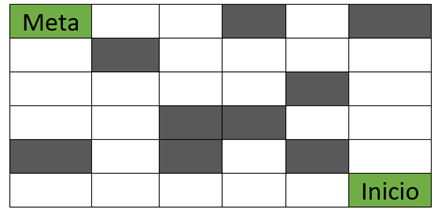

Tomaremos el inicio como 0,0 y la meta como 5,5

In [31]:
class laberinto(SearchProblem):
  'Simple Graph as a search problem'

  def actions(self, node):

    posicion=list()
    movimientos=list()
    frontera=list()
      
    posicion=node.state.split(',')
    posicion[0]=int(posicion[0]) #X
    posicion[1]=int(posicion[1]) #Y

    movimientos=[[-1,-1],[ 0,-1],[1,-1],
                  [-1, 0],        [1, 0],
                  [-1, 1],[ 0, 1],[1, 1]]

    if posicion not in estados_visitados:
      res=1
      estados_visitados.append(posicion)
    else:
      res=0
    
    if res==1:
      for i in range(len(movimientos)):

        X=posicion[0]+movimientos[i][0]
        Y=posicion[1]+movimientos[i][1]
        mov=[X,Y]

        if mov not in obstaculos:
          if 0<=X<=5 and 0<=Y<=5:
            data='move-'+str(X)+','+str(Y)
            if(data not in frontera):
              frontera.append(data)
    else:
      frontera=[]
    
    actions = {
                node.state: frontera,
        }
    return actions[node.state]       

  def result(self, node, action):

    new_state=dict()
    action_result=action[5:]
    
    for i in action:
      new_state[action]=action_result

    new_node = Node(new_state[action], node, action)
    new_cost = self.action_cost(node,action,new_node)
    new_node.cost = new_cost
    return new_node     

  def action_cost(self, node, action, succesor):
    cost=dict()
    cost[node.state,succesor.state]=1

    return cost[(node.state, succesor.state)]

  def h(self, node):
    heuristic=dict()

    goal=[0,0]
    posicion=node.state.split(',')
    posicion[0]=int(posicion[0]) #X
    posicion[1]=int(posicion[1]) #Y

    Euclidiana=math.sqrt((abs(-posicion[0]+goal[0])**2)+abs((-posicion[1]+goal[1])**2))
    heuristic[node.state]=Euclidiana
    return heuristic[node.state]  

Estado inicial:


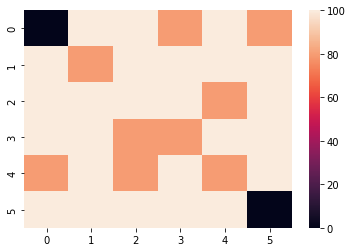

--------------UCS------------
Action sequence: ['move-5,4', 'move-4,3', 'move-3,2', 'move-2,1', 'move-1,0', 'move-0,0']
State sequence: [5,5, 5,4, 4,3, 3,2, 2,1, 1,0, 0,0]
Costo: 6
Nodos expandidos 24
Estado final:


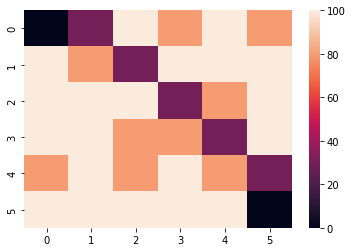

In [32]:
data=list()
tamX=6
tamY=6

initial='5,5'
goal='0,0'
obstaculos=[[5,0],[4,2],[4,4],[3,0],[3,3],[2,3],[2,4],[1,1],[0,4]]

#---------------------------Visualizacion------------------------------------#
for i in range(tamY):
  data.append([100]*tamX)

for j in range(len(obstaculos)):
  data[obstaculos[j][1]][obstaculos[j][0]]=80

lista=initial.split(',')
lista[0]=int(lista[0])#x
lista[1]=int(lista[1])#Y
data[lista[0]][lista[1]]=0

lista=goal.split(',')
lista[0]=int(lista[0])#x
lista[1]=int(lista[1])#Y
data[lista[0]][lista[1]]=0

print("Estado inicial:")
hm = sn.heatmap(data = data) 
plt.show()

#---------------------------Problema------------------------------------#

S = Node(state=initial)
G = Node(state=goal)
Problema = laberinto(initial=S, goal=G)
estados_visitados.clear()

print('--------------UCS------------')
solution = UCS(Problema)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Costo:', Problema.g(solution))
Nodos=len(estados_visitados)
print('Nodos expandidos',Nodos)

#---------------------Visualizacion solucion del problema--------------#
for h in range(len(solution.states_path())):
  if h!=0 and h!=len(solution.states_path())-1:
    pos=str(solution.states_path()[h])
    x=int(pos[0])
    y=int(pos[2])
    data[y][x]=30
print("Estado final:")
hm = sn.heatmap(data = data) 
plt.show()


Estado inicial:


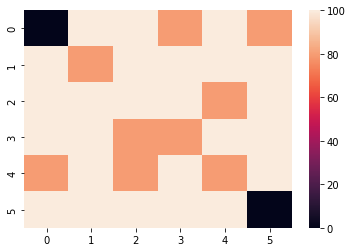

--------------VORAZ------------
Action sequence: ['move-5,4', 'move-4,3', 'move-3,2', 'move-2,1', 'move-1,0', 'move-0,0']
State sequence: [5,5, 5,4, 4,3, 3,2, 2,1, 1,0, 0,0]
Costo: 6
Nodos expandidos 6
Estado final:


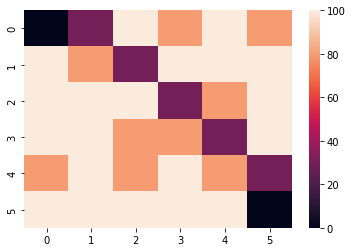

In [33]:
data=list()
tamX=6
tamY=6

initial='5,5'
goal='0,0'
obstaculos=[[5,0],[4,2],[4,4],[3,0],[3,3],[2,3],[2,4],[1,1],[0,4]]

#---------------------------Visualizacion------------------------------------#
for i in range(tamY):
  data.append([100]*tamX)

for j in range(len(obstaculos)):
  data[obstaculos[j][1]][obstaculos[j][0]]=80

lista=initial.split(',')
lista[0]=int(lista[0])#x
lista[1]=int(lista[1])#Y
data[lista[0]][lista[1]]=0

lista=goal.split(',')
lista[0]=int(lista[0])#x
lista[1]=int(lista[1])#Y
data[lista[0]][lista[1]]=0

print("Estado inicial:")
hm = sn.heatmap(data = data) 
plt.show()

#---------------------------Problema------------------------------------#

S = Node(state=initial)
G = Node(state=goal)
Problema = laberinto(initial=S, goal=G)
estados_visitados.clear()

print('--------------VORAZ------------')
solution = VORAZ(Problema)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Costo:', Problema.g(solution))
Nodos=len(estados_visitados)
print('Nodos expandidos',Nodos)

#---------------------Visualizacion solucion del problema--------------#
for h in range(len(solution.states_path())):
  if h!=0 and h!=len(solution.states_path())-1:
    pos=str(solution.states_path()[h])
    x=int(pos[0])
    y=int(pos[2])
    data[y][x]=30
print("Estado final:")
hm = sn.heatmap(data = data) 
plt.show()

Estado inicial:


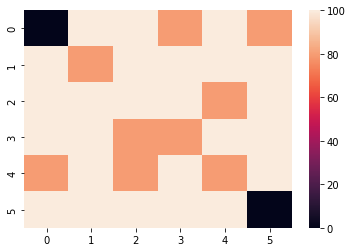

--------------A*------------
Action sequence: ['move-5,4', 'move-4,3', 'move-3,2', 'move-2,1', 'move-1,0', 'move-0,0']
State sequence: [5,5, 5,4, 4,3, 3,2, 2,1, 1,0, 0,0]
Costo: 6
Nodos expandidos 6
Estado final:


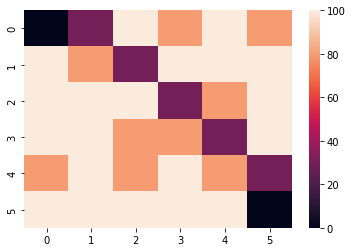

In [34]:
data=list()
tamX=6
tamY=6

initial='5,5'
goal='0,0'
obstaculos=[[5,0],[4,2],[4,4],[3,0],[3,3],[2,3],[2,4],[1,1],[0,4]]

#---------------------------Visualizacion------------------------------------#
for i in range(tamY):
  data.append([100]*tamX)

for j in range(len(obstaculos)):
  data[obstaculos[j][1]][obstaculos[j][0]]=80

lista=initial.split(',')
lista[0]=int(lista[0])#x
lista[1]=int(lista[1])#Y
data[lista[0]][lista[1]]=0

lista=goal.split(',')
lista[0]=int(lista[0])#x
lista[1]=int(lista[1])#Y
data[lista[0]][lista[1]]=0

print("Estado inicial:")
hm = sn.heatmap(data = data) 
plt.show()

#---------------------------Problema------------------------------------#

S = Node(state=initial)
G = Node(state=goal)
Problema = laberinto(initial=S, goal=G)
estados_visitados.clear()

print('--------------A*------------')
solution = A(Problema)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Costo:', Problema.g(solution))
Nodos=len(estados_visitados)
print('Nodos expandidos',Nodos)

#---------------------Visualizacion solucion del problema--------------#
for h in range(len(solution.states_path())):
  if h!=0 and h!=len(solution.states_path())-1:
    pos=str(solution.states_path()[h])
    x=int(pos[0])
    y=int(pos[2])
    data[y][x]=30
print("Estado final:")
hm = sn.heatmap(data = data) 
plt.show()

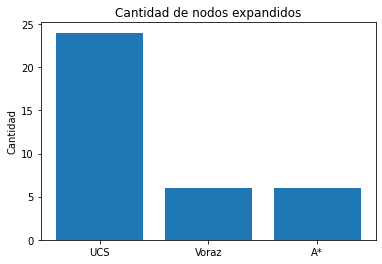

In [149]:
metodos=['UCS','Voraz','A*']
nodos=[24,6,6]
fig, ax = plt.subplots()
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de nodos expandidos')
plt.bar(metodos, nodos)
plt.show()


# Punto 3: Modelado para el usuario

In [155]:
global celdasX
global celdasY

class laberintoGeneral(SearchProblem):
  'Simple Graph as a search problem'

  def actions(self, node):

    posicion=list()
    movimientos=list()
    frontera=list()
      
    posicion=node.state.split(',')
    posicion[0]=int(posicion[0]) #X
    posicion[1]=int(posicion[1]) #Y

    movimientos=[[-1,-1],[ 0,-1],[1,-1],
                  [-1, 0],        [1, 0],
                  [-1, 1],[ 0, 1],[1, 1]]

    if posicion not in estados_visitados:
      res=1
      estados_visitados.append(posicion)
    else:
      res=0
    
    if res==1:
      for i in range(len(movimientos)):

        X=posicion[0]+movimientos[i][0]
        Y=posicion[1]+movimientos[i][1]
        mov=[X,Y]

        if mov not in obstaculos:
          if 0<=X<int(celdasX) and 0<=Y<int(celdasY):
            data='move-'+str(X)+','+str(Y)
            if(data not in frontera):
              frontera.append(data)
    else:
      frontera=[]
    
    actions = {
                node.state: frontera,
        }
    return actions[node.state]       

  def result(self, node, action):

    new_state=dict()
    action_result=action[5:]
    
    for i in action:
      new_state[action]=action_result

    new_node = Node(new_state[action], node, action)
    new_cost = self.action_cost(node,action,new_node)
    new_node.cost = new_cost
    return new_node     

  def action_cost(self, node, action, succesor):
    cost=dict()
    cost[node.state,succesor.state]=1

    return cost[(node.state, succesor.state)]

  def h(self, node):
    heuristic=dict()

    goal=[0,0]
    posicion=node.state.split(',')
    posicion[0]=int(posicion[0]) #X
    posicion[1]=int(posicion[1]) #Y

    Euclidiana=math.sqrt((abs(-posicion[0]+goal[0])**2)+abs((-posicion[1]+goal[1])**2))
    heuristic[node.state]=Euclidiana
    return heuristic[node.state]  

Digite el numero de celdas en X
9
Digite el numero de celdas en Y
6
Digite la coordenada X del punto objetivo
6
Digite la coordenada Y del punto objetivo
5
Su punto de inicio es: 6,5  el objetivo es  0,0


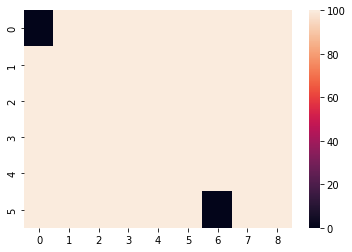

el numero maximo de obstaculos es: 52
diga el porcentaje de obstaculos que quiere tener, evite usar %
se recomienda usar un porcentaje menor al 50%
40
se generaran:  20 obstaculos
[[3, 0], [2, 3], [8, 0], [4, 0], [3, 4], [0, 3], [5, 0], [0, 4], [8, 4], [2, 2], [4, 4], [7, 1], [7, 3], [7, 2], [1, 1], [1, 5], [0, 5], [1, 4], [2, 4], [6, 0], [0, 1]]
problema inicial:


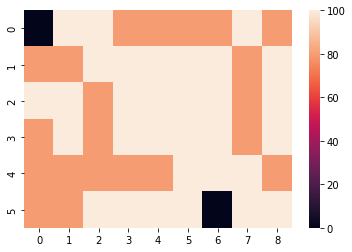

In [156]:
data=list()
obstaculos.clear()

print("Digite el numero de celdas en X")
celdasX=input()
print("Digite el numero de celdas en Y")
celdasY=input()

i=1

while i!=0:
  print("Digite la coordenada X del punto objetivo")
  inicioX=input()
  print("Digite la coordenada Y del punto objetivo")
  inicioY=input()

  if int(celdasX)-1>= int(inicioX) and int(celdasY)-1>= int(inicioY):
    i=0
  else:
    print('coordenadas invalidas, digite de nuevo, debe estar dentro del rango')

initial=inicioX+","+inicioY
goal='0,0'
print("Su punto de inicio es:",initial," el objetivo es ",goal)

for i in range(int(celdasY)):
  data.append([100]*int(celdasX))

listaGoal=goal.split(',')
listaGoal[0]=int(listaGoal[0])#x
listaGoal[1]=int(listaGoal[1])#Y
data[listaGoal[1]][listaGoal[0]]=0

listaInitial=initial.split(',')
listaInitial[0]=int(listaInitial[0])#x
listaInitial[1]=int(listaInitial[1])#Y

data[listaInitial[1]][listaInitial[0]]=0

hm = sn.heatmap(data) 
plt.show()

print("el numero maximo de obstaculos es:",int(celdasX)*int(celdasY)-2)
print("diga el porcentaje de obstaculos que quiere tener, evite usar %")
print("se recomienda usar un porcentaje menor al 50%")
obs=input()

numeroobj=(int(celdasX)*int(celdasY)-2)*(int(obs)/100)
print("se generaran: ",int(numeroobj), "obstaculos")

i=0
while i <= numeroobj:
  obsX=random.randint(0, int(celdasX)-1)
  obsY=random.randint(0, int(celdasY)-1)

  
  obs=[obsX,obsY]

  if obs not in obstaculos and obs!=listaInitial and obs!=listaGoal:
    obstaculos.append(obs)
    i=i+1

    

print(obstaculos)
for j in range(len(obstaculos)):
  data[obstaculos[j][1]][obstaculos[j][0]]=80

print('problema inicial:')
hm = sn.heatmap(data) 
plt.show()




--------------UCS------------
Action sequence: ['move-5,4', 'move-4,3', 'move-3,2', 'move-2,1', 'move-1,0', 'move-0,0']
State sequence: [6,5, 5,4, 4,3, 3,2, 2,1, 1,0, 0,0]
Costo: 6
Nodos expandidos 30
Estado final:


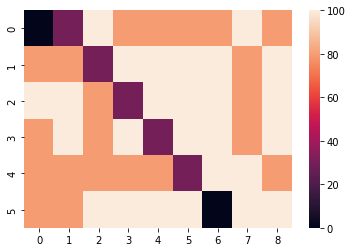

In [157]:
S = Node(state=initial)
G = Node(state=goal)
Problema = laberintoGeneral(initial=S, goal=G)
estados_visitados.clear()

print('--------------UCS------------')
solution = UCS(Problema)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Costo:', Problema.g(solution))
NodosU=len(estados_visitados)
print('Nodos expandidos',NodosU)

#---------------------Visualizacion solucion del problema--------------#
for h in range(len(solution.states_path())):
  if h!=0 and h!=len(solution.states_path())-1:
    pos=str(solution.states_path()[h])
    x=int(pos[0])
    y=int(pos[2])
    data[y][x]=30
print("Estado final:")
hm = sn.heatmap(data = data) 
plt.show()

--------------VORAZ------------
Action sequence: ['move-5,4', 'move-4,3', 'move-3,2', 'move-2,1', 'move-1,0', 'move-0,0']
State sequence: [6,5, 5,4, 4,3, 3,2, 2,1, 1,0, 0,0]
Costo: 6
Nodos expandidos 6
Estado final:


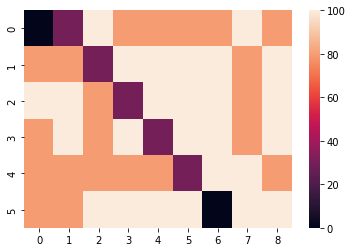

In [158]:
S = Node(state=initial)
G = Node(state=goal)
Problema = laberintoGeneral(initial=S, goal=G)
estados_visitados.clear()

print('--------------VORAZ------------')
solution = VORAZ(Problema)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Costo:', Problema.g(solution))
NodosV=len(estados_visitados)
print('Nodos expandidos',NodosV)

#---------------------Visualizacion solucion del problema--------------#
for h in range(len(solution.states_path())):
  if h!=0 and h!=len(solution.states_path())-1:
    pos=str(solution.states_path()[h])
    x=int(pos[0])
    y=int(pos[2])
    data[y][x]=30
print("Estado final:")
hm = sn.heatmap(data = data) 
plt.show()

--------------A*------------
Action sequence: ['move-5,4', 'move-4,3', 'move-3,2', 'move-2,1', 'move-1,0', 'move-0,0']
State sequence: [6,5, 5,4, 4,3, 3,2, 2,1, 1,0, 0,0]
Costo: 6
Nodos expandidos 6
Estado final:


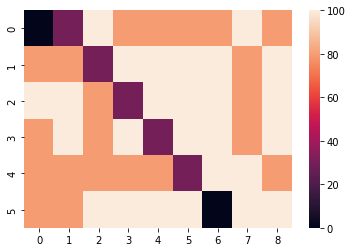

In [159]:
S = Node(state=initial)
G = Node(state=goal)
Problema = laberintoGeneral(initial=S, goal=G)
estados_visitados.clear()

print('--------------A*------------')
solution = A(Problema)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Costo:', Problema.g(solution))
NodosA=len(estados_visitados)
print('Nodos expandidos',NodosA)

#---------------------Visualizacion solucion del problema--------------#
for h in range(len(solution.states_path())):
  if h!=0 and h!=len(solution.states_path())-1:
    pos=str(solution.states_path()[h])
    x=int(pos[0])
    y=int(pos[2])
    data[y][x]=30
print("Estado final:")
hm = sn.heatmap(data = data) 
plt.show()

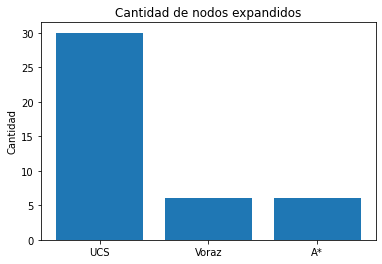

In [160]:
metodos=['UCS','Voraz','A*']
nodos=[NodosU,NodosV,NodosA]
fig, ax = plt.subplots()
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de nodos expandidos')
plt.bar(metodos, nodos)
plt.show()